# Actividad 2: Convolutional Neural Networks


### Integrantes:



|   |   Integrantes                 |
|---|:-----------------------------:|
| 0 |  Leydi Milena Cortés Forero   |   
| 1 |  Ramón Rodriguez Angarita     |   
| 2 | Juan Sebastian Zapata Llano   |   
| 3 | Richard Camilo Saavedra Coneo |  

### Actividad

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar imágenes de personajes de la conocida serie de los Simpsons.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://i.imgur.com/i8zIGqX.jpg" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en imágenes de personajes de los Simpsons extraídas directamente de capítulos de la serie. Este dataset ha sido recopilado por [Alexandre Attia](http://www.alexattia.fr/) y es más complejo que el dataset de Fashion MNIST que hemos utilizado hasta ahora. Aparte de tener más clases (vamos a utilizar los 18 personajes con más imágenes), los personajes pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros personajes en pantalla (si bien el personaje a clasificar siempre aparece en la posición predominante).

El dataset de training puede ser descargado desde aquí:

[Training data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60) (~500MB)

Por otro lado, el dataset de test puede ser descargado de aquí:

[Test data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8) (~10MB)

Antes de empezar la práctica, se recomienda descargar las imágenes y echarlas un vistazo.

##1. Procesamiento de los dataset

### Cargamos Librerias

In [ ]:
import cv2
import os
from os import remove
import shutil
import numpy as np 
import keras
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.utils import data_utils

### Descargamos y guardamos los Datos

In [ ]:
# Primero, bajamos los datos de entrenamiento
keras.utils.get_file(fname="simpsons_train.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60")

# Descomprimimos el archivo
!tar -xzf /root/.keras/datasets/simpsons_train.tar.gz -C /root/.keras/datasets

# Hacemos lo mismo con los datos de test
keras.utils.get_file(fname="simpsons_test.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8")
!tar -xzf /root/.keras/datasets/simpsons_test.tar.gz -C /root/.keras/datasets

# Cargamos la carpeta de test organizada para utilizar generator de keras 
keras.utils.get_file(fname="test_simpsons.zip", 
                     origin="https://github.com/richardcmg7/sistemascognitivos/raw/main/test_simpsons.zip")

!cd /root/.keras/datasets/

!unzip -q /root/.keras/datasets/test_simpsons.zip

### Eliminar Imágenes no adecuadas


In [ ]:
# Crear una carpeta en el directorio principal de las imágenes que se quieren borrar de un carater específico
# Se debe agregar los archivos que se quieren borrar del dataset de keras.
# Recibe el nombre de la carpeta del dataset de Keras y el nombre de la carpeta con los archivos a borrar.
def list_files_error(directory):
    try:
        list_error = os.listdir(directory)
        images=[]
        for file in list_error:
            if os.path.isfile(os.path.join(directory, file)) and file.endswith('.jpg'):
                images.append(file)
        return images
    except: 
        print("No se ha cargado la carpeta con las imágenes a eliminar")
        return 0


def list_files_keras(directory):
    try:
        list = os.listdir('/root/.keras/datasets/simpsons/'+ directory)
        if len(list) == 0:
            print("No files in Directory")
            return 0
        return list
    except:
        print("Directory doesn't exit")
    return 0

def  clean_images(principal_folder, errors_folder):
    list_principal_folder = list_files_keras(principal_folder)
    list_errors_folder = list_files_error(errors_folder)
    if list_errors_folder != 0:
        count = 0
        for x in list_principal_folder:
            for y in list_errors_folder:
                if x == y:
                    remove('/root/.keras/datasets/simpsons/' + principal_folder + '/' + x)
                    print(f'Borrando el archivo {x}')
                    #print(count)
                    count += 1

    else:
        count = 0
        print("No existen archivos en la carpeta con los archivos a borrar")

    print(f'Se borraron en total: {count} archivos' )



In [ ]:
clean_images('apu_nahasapeemapetilon','apu_error')

No se ha cargado la carpeta con las imagenes a eliminar
No existen archivos en la carpeta con los archivos a borrar
Se borraron en total: 0 archivos


In [ ]:
clean_images('principal_skinner','principal_error')

No se ha cargado la carpeta con las imagenes a eliminar
No existen archivos en la carpeta con los archivos a borrar
Se borraron en total: 0 archivos


In [ ]:
clean_images('nelson_muntz','nelson_error')

No se ha cargado la carpeta con las imagenes a eliminar
No existen archivos en la carpeta con los archivos a borrar
Se borraron en total: 0 archivos


In [ ]:
list = os.listdir('/root/.keras/datasets/simpsons/'+ 'apu_nahasapeemapetilon')
list

### Selección de personajes

In [ ]:
DATASET_TRAIN_PATH_COLAB = "/root/.keras/datasets/simpsons"
DATASET_TEST_PATH_COLAB = "/root/.keras/datasets/simpsons_testset"  # Normal
# DATASET_TEST_PATH_COLAB = "/root/.keras/datasets/test_simpsons" #For Data Augmentation

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

### Borrar Carpetas no utilizadas

In [ ]:
# Se utiliza para la estrategia de DataAugmentation
# Después de seleccionados los caracteres borro las carpetas no utilizadas.
# Borra las carpetas que no se encuentran en la selección de personajes.

def folder_list(folder=DATASET_TRAIN_PATH_COLAB):
    return os.listdir(folder)

def list_to_leave(list=MAP_CHARACTERS):
    return {v for v in MAP_CHARACTERS.values()}

def clean_folders(folder, dict_to_leave):
    f_list = folder_list(folder)
    f_t_leave = list_to_leave(dict_to_leave)
    count = 0 
    for x in f_list:
        #f = find_folder(x, f_t_leave)
        f = x in f_t_leave
        if f == False:
            shutil.rmtree(DATASET_TRAIN_PATH_COLAB + '/' + x)
            print(f"Borrando la carperta {x}")
            count += 1

    print(f"Se han eliminado {count} carpetas")

#clean_folders(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)

In [ ]:
#import os
#list = os.listdir('/root/.keras/datasets/simpsons/')
#list

['chief_wiggum',
 'krusty_the_clown',
 'principal_skinner',
 'comic_book_guy',
 'moe_szyslak',
 'marge_simpson',
 'sideshow_bob',
 'milhouse_van_houten',
 'charles_montgomery_burns',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'nelson_muntz',
 'ned_flanders',
 'kent_brockman',
 'abraham_grampa_simpson',
 'homer_simpson',
 'edna_krabappel',
 'lisa_simpson']

Simpson test
https://drive.google.com/drive/folders/1eptIkg8JevxvT2E4uwxOE5xkHuJ3hDYJ?usp=sharing

Simpson Train
https://drive.google.com/drive/folders/1wHidmYqhOiJwWKpXUl4fCtC0ZZChHtIk?usp=sharing

### Funciones básicas iniciales

In [ ]:
def plot_result(history = 'history', name_accuracy='sparse_categorical_accuracy', name_loss = 'loss'):
    #-----------------------------------------------------------
    # Recupera los resultados sobre los datos de entrenamiento y test
    # para cada época de entrenamiento
    #-----------------------------------------------------------
    acc      = history.history[ name_accuracy ]
    val_acc  = history.history[ 'val_'+name_accuracy ]
    loss     = history.history[ name_loss ]
    val_loss = history.history[ 'val_'+name_loss ]

    epochs   = range(len(acc)) # Obtiene el número de epocas

    #------------------------------------------------
    # Gráfica de precisión de entrenamiento y validación por  epoch
    #------------------------------------------------
    plt.rcParams["figure.figsize"] = (8, 4)
    fig, axes = plt.subplots(ncols=2, nrows=1)
    ax1, ax2 = axes.ravel()

    # plt.subplot(211)
    ax1.plot  ( epochs,     acc, label='Entrenamiento')
    ax1.plot  ( epochs, val_acc, label='Validación')
    ax1.set_title ('Precisión Entrenamiento y validación')
    ax1.legend()
    #ax1.figure()

    #------------------------------------------------
    # Gráfica de pérdida (loss) entrenamiento y validación por época
    #------------------------------------------------
    # plt.subplot(212)
    ax2.plot  ( epochs,     loss, label='Entrenamiento')
    ax2.plot  ( epochs, val_loss, label='Validación')
    ax2.legend()
    ax2.set_title ('Pérdida en entrenamiento y validación')


In [ ]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.
    
    Como las imágenes tienen tamaños distintos, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas
     
    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [ ]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))   
    return np.array(X_test), np.array(y_test)


### Cargamos a las variables los datos

In [ ]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [ ]:
# Vamos a barajar aleatoriamente los datos. Esto es importante ya que si no
# lo hacemos y, por ejemplo, cogemos el 20% de los datos finales como validation
# set, estaremos utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

## Entregable


Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas: 
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que nuestro modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting. Una posible partición puede ser 80 / 20.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como hemos hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

## Pre Procesado de los datos

### Exploración inicial del *dataset*

Después de cargar los datos tenemos un dataset con imágenes de tamaño 64 x 64 pixeles con 3 canales (R, G, B)

In [ ]:
X[0].shape

(64, 64, 3)

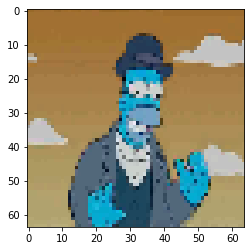

In [ ]:
plt.imshow(X[3500])

La variable **( y )** contiene la etiqueta a la que correponde cada imagen. Son 18 personajes a clasificar

In [ ]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

### Normalización de Imagenes

In [ ]:
X_train_val = X / 255.0

In [ ]:
print(X_train_val.shape)
print(X.shape)

(18992, 64, 64, 3)
(18992, 64, 64, 3)


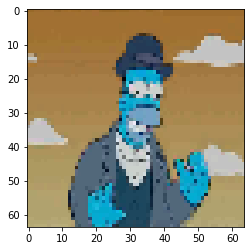

In [ ]:
plt.imshow(X_train_val[3500])

In [ ]:
y[3500]

7

### Selección datos de Entrenamiento y validación

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y, test_size=0.2, random_state=42)

In [ ]:
print(f"El set de datos X_train es {X_train.shape}")
print(f"El set de datos y_train es {y_train.shape}")
print(f"El set de datos X_valid es {X_valid.shape}")
print(f"El set de datos y_valid es {y_valid.shape}")
print(f"el set de datos de y contiene los siguientes valores únicos {set(y_train)}")
print("Los cuales corresponden a la categoría de una imagen")

El set de datos X_train es (15193, 64, 64, 3)
El set de datos y_train es (15193,)
El set de datos X_valid es (3799, 64, 64, 3)
El set de datos y_valid es (3799,)
el set de datos de y contiene los siguientes valores unicos {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
Los cuales corresponden a la categoria de una imagen


### Data Augmentation

Data augmentation se implementará en el modelo 3

In [ ]:
datagen = ImageDataGenerator(validation_split=0.3,
                             rescale = 1./255.,
                             rotation_range = 20,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

## Entrenamiento Red Convolucional

---



Para el desarrollo de la actividad se generaron diferentes modelos. A continuación se presenta un ejemplo de configuración. 

### Añadir la primera capa de convolución

Hiperparámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- input_shape: (64, 64, 3)

### Añadir una segunda capa convolucional y la capa de max-pooling 

Hiperparámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hiperparámetros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

### Añadir la tercera capa convolucional

Hiperparámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

## Modelo Inicial

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 3]))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dropout(0.1))

In [ ]:
model.add(tf.keras.layers.Dense(units=18, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer='rmsprop', 
              metrics=["sparse_categorical_accuracy"])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(X_train,y_train,
                    batch_size=64,
                    epochs=20, 
                    callbacks=[callback],
                    validation_data=(X_valid, y_valid))

Epoch 1/20
238/238 [==============================] - 4s 17ms/step - loss: 2.0197 - sparse_categorical_accuracy: 0.3873 - val_loss: 1.7640 - val_sparse_categorical_accuracy: 0.4728
Epoch 2/20
238/238 [==============================] - 4s 16ms/step - loss: 1.1304 - sparse_categorical_accuracy: 0.6614 - val_loss: 1.1555 - val_sparse_categorical_accuracy: 0.6631
Epoch 3/20
238/238 [==============================] - 4s 16ms/step - loss: 0.7033 - sparse_categorical_accuracy: 0.7896 - val_loss: 0.8249 - val_sparse_categorical_accuracy: 0.7602
Epoch 4/20
238/238 [==============================] - 4s 16ms/step - loss: 0.4168 - sparse_categorical_accuracy: 0.8722 - val_loss: 0.7813 - val_sparse_categorical_accuracy: 0.7915
Epoch 5/20
238/238 [==============================] - 4s 16ms/step - loss: 0.2509 - sparse_categorical_accuracy: 0.9229 - val_loss: 0.7191 - val_sparse_categorical_accuracy: 0.8192
Epoch 6/20
238/238 [==============================] - 4s 16ms/step - loss: 0.1460 - sparse_cate

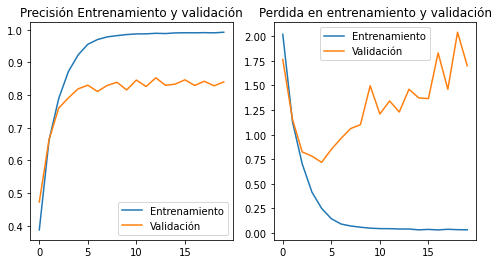

In [ ]:
plot_result(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_t, y_t)

28/28 [==============================] - 0s 6ms/step - loss: 200.0250 - sparse_categorical_accuracy: 0.8787


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8786516785621643


## Modelo 1

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 3]))
model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model1.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.1))
model1.add(tf.keras.layers.Dense(units=18, activation='softmax'))

model1.compile(loss="sparse_categorical_crossentropy", 
              optimizer='rmsprop', 
              metrics=["sparse_categorical_accuracy"])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history1 = model1.fit(X_train,y_train,
                    batch_size=64,
                    epochs=20, 
                    callbacks=[callback],
                    validation_data=(X_valid, y_valid))

Epoch 1/20
238/238 [==============================] - 8s 35ms/step - loss: 2.1742 - sparse_categorical_accuracy: 0.3352 - val_loss: 1.3554 - val_sparse_categorical_accuracy: 0.5686
Epoch 2/20
238/238 [==============================] - 8s 33ms/step - loss: 1.0437 - sparse_categorical_accuracy: 0.6835 - val_loss: 1.0442 - val_sparse_categorical_accuracy: 0.6870
Epoch 3/20
238/238 [==============================] - 8s 34ms/step - loss: 0.5889 - sparse_categorical_accuracy: 0.8238 - val_loss: 0.6781 - val_sparse_categorical_accuracy: 0.8076
Epoch 4/20
238/238 [==============================] - 8s 34ms/step - loss: 0.3632 - sparse_categorical_accuracy: 0.8880 - val_loss: 0.5945 - val_sparse_categorical_accuracy: 0.8558
Epoch 5/20
238/238 [==============================] - 8s 34ms/step - loss: 0.2340 - sparse_categorical_accuracy: 0.9282 - val_loss: 0.5778 - val_sparse_categorical_accuracy: 0.8389
Epoch 6/20
238/238 [==============================] - 8s 34ms/step - loss: 0.1651 - sparse_cate

In [ ]:
 test_loss, test_accuracy = model1.evaluate(X_t, y_t)

28/28 [==============================] - 0s 7ms/step - loss: 179.0073 - sparse_categorical_accuracy: 0.8944


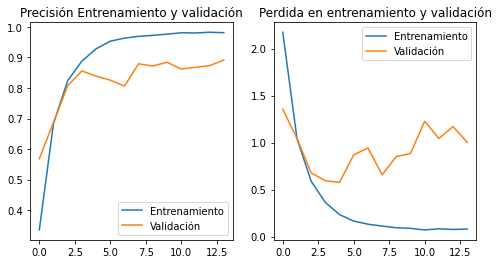

In [ ]:
plot_result(history1)

In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8943819999694824


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

predicciones = model1.predict(X_t)
y_pred = np.argmax(predicciones, axis=1)
score = accuracy_score(y_t, y_pred)


#### Evaluación de la predicción

In [ ]:
print(classification_report(y_t, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        48
           1       0.98      0.86      0.91        50
           2       0.94      0.90      0.92        50
           3       0.91      0.90      0.91        48
           4       0.98      0.94      0.96        50
           5       0.98      0.90      0.94        49
           6       0.98      0.84      0.90        50
           7       0.77      0.94      0.85        50
           8       0.82      0.94      0.88        50
           9       0.98      0.96      0.97        50
          10       0.62      0.94      0.75        50
          11       0.96      0.98      0.97        50
          12       0.86      1.00      0.92        49
          13       0.80      0.88      0.84        50
          14       0.98      0.88      0.92        49
          15       1.00      0.70      0.82        50
          16       0.97      0.76      0.85        50
          17       1.00    

## Modelo 2

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 3]))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(units=18, activation='softmax'))

model2.compile(loss="sparse_categorical_crossentropy", 
              optimizer='rmsprop', 
              metrics=["sparse_categorical_accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history2 = model2.fit(X_train,y_train,
                    batch_size=64,
                    epochs=20, 
                    callbacks=[callback],
                    validation_data=(X_valid, y_valid))
print(model2.summary())

Epoch 1/20
238/238 [==============================] - 8s 35ms/step - loss: 2.3328 - sparse_categorical_accuracy: 0.2925 - val_loss: 1.7995 - val_sparse_categorical_accuracy: 0.4617
Epoch 2/20
238/238 [==============================] - 8s 33ms/step - loss: 1.1807 - sparse_categorical_accuracy: 0.6406 - val_loss: 0.7360 - val_sparse_categorical_accuracy: 0.7823
Epoch 3/20
238/238 [==============================] - 8s 33ms/step - loss: 0.6562 - sparse_categorical_accuracy: 0.8021 - val_loss: 0.5436 - val_sparse_categorical_accuracy: 0.8444
Epoch 4/20
238/238 [==============================] - 8s 33ms/step - loss: 0.4104 - sparse_categorical_accuracy: 0.8759 - val_loss: 0.5605 - val_sparse_categorical_accuracy: 0.8360
Epoch 5/20
238/238 [==============================] - 8s 34ms/step - loss: 0.2691 - sparse_categorical_accuracy: 0.9173 - val_loss: 0.5221 - val_sparse_categorical_accuracy: 0.8697
Epoch 6/20
238/238 [==============================] - 8s 34ms/step - loss: 0.1975 - sparse_cate

In [ ]:
test_loss, test_accuracy = model2.evaluate(X_t, y_t)

28/28 [==============================] - 0s 7ms/step - loss: 293.3507 - sparse_categorical_accuracy: 0.8753


Evaluate Score: 0.8752808988764045
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.95      0.84      0.89        50
           2       0.85      0.82      0.84        50
           3       0.84      0.88      0.86        48
           4       0.98      0.98      0.98        50
           5       0.87      0.94      0.90        49
           6       0.93      0.80      0.86        50
           7       1.00      0.88      0.94        50
           8       0.98      0.86      0.91        50
           9       0.89      0.94      0.91        50
          10       0.60      0.90      0.72        50
          11       0.94      0.98      0.96        50
          12       0.96      0.98      0.97        49
          13       0.61      0.98      0.75        50
          14       0.98      0.94      0.96        49
          15       0.90      0.88      0.89        50
          16       0.97      0.56      0.71   

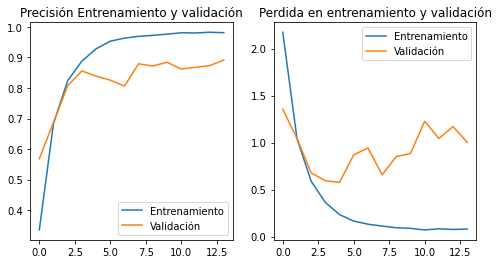

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
predicciones = model2.predict(X_t)
y_pred = np.argmax(predicciones, axis=1)
score = accuracy_score(y_t, y_pred)
print(f"Evaluate Score: {score}")
print(classification_report(y_t, y_pred))
plot_result(history1)
print(model2.evaluate(X_t, y_t))

## Modelo 3 - Usando Data Augmentation

Usando dataAugmentation no es necesario correr las "funciones básicas iniciales"
* load_train_set
* load_test_set

In [ ]:
datagen = ImageDataGenerator(validation_split=0.3,
                             rescale = 1./255.,
                             rotation_range = 20,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# Se debe usar la función "Borrar carpetas no utilizadas"
# Para seleccionar los personajes con mayor número de muestras.
clean_folders(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)

Borrando la carperta snake_jailbird
Borrando la carperta carl_carlson
Borrando la carperta otto_mann
Borrando la carperta mayor_quimby
Borrando la carperta jasper_beardly
Borrando la carperta fat_tony
Borrando la carperta hans_moleman
Borrando la carperta lenny_leonard
Borrando la carperta martin_prince
Borrando la carperta waylon_smithers
Borrando la carperta disco_stu
Borrando la carperta selma_bouvier
Borrando la carperta cletus_spuckler
Borrando la carperta agnes_skinner
Borrando la carperta jimbo_jones
Borrando la carperta groundskeeper_willie
Borrando la carperta sideshow_mel
Borrando la carperta maggie_simpson
Borrando la carperta professor_john_frink
Borrando la carperta troy_mcclure
Borrando la carperta patty_bouvier
Borrando la carperta gil
Borrando la carperta lionel_hutz
Borrando la carperta bumblebee_man
Borrando la carperta barney_gumble
Borrando la carperta miss_hoover
Borrando la carperta rainier_wolfcastle
Borrando la carperta ralph_wiggum
Borrando la carperta helen_lo

In [ ]:
batch_size = 32

train_generator = datagen.flow_from_directory(
    DATASET_TRAIN_PATH_COLAB, 
    subset='training',
    target_size=(64, 64),  
    batch_size=batch_size,
    class_mode='categorical')  


val_generator = datagen.flow_from_directory(
    DATASET_TRAIN_PATH_COLAB,
    subset='validation',
    target_size=(64, 64),  
    batch_size=batch_size,
    class_mode='categorical')  

test_generator = test_datagen.flow_from_directory(
    DATASET_TEST_PATH_COLAB,
    batch_size=batch_size,
    target_size = (64, 64),
    class_mode='categorical')

Found 13304 images belonging to 18 classes.
Found 5688 images belonging to 18 classes.
Found 890 images belonging to 18 classes.


In [ ]:
model_data = tf.keras.models.Sequential()
model_data.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 3]))
model_data.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model_data.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model_data.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model_data.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model_data.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model_data.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model_data.add(tf.keras.layers.Flatten())
model_data.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model_data.add(tf.keras.layers.Dropout(0.1))
model_data.add(tf.keras.layers.Dense(units=18, activation='softmax'))

model_data.compile(loss="categorical_crossentropy", 
              optimizer='rmsprop', 
              metrics=["accuracy"])
model_data.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

history = model_data.fit_generator(
        train_generator,
        epochs=20,
        callbacks = [callback],
        validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
416/416 [==============================] - 66s 158ms/step - loss: 2.2622 - accuracy: 0.3054 - val_loss: 1.9750 - val_accuracy: 0.4230
Epoch 2/20
416/416 [==============================] - 66s 158ms/step - loss: 1.3962 - accuracy: 0.5690 - val_loss: 1.4032 - val_accuracy: 0.5914
Epoch 3/20
416/416 [==============================] - 66s 157ms/step - loss: 1.0209 - accuracy: 0.6912 - val_loss: 1.0833 - val_accuracy: 0.6872
Epoch 4/20
416/416 [==============================] - 65s 157ms/step - loss: 0.8138 - accuracy: 0.7573 - val_loss: 0.9319 - val_accuracy: 0.7312
Epoch 5/20
416/416 [==============================] - 65s 157ms/step - loss: 0.7122 - accuracy: 0.7949 - val_loss: 0.9180 - val_accuracy: 0.7430
Epoch 6/20
416/416 [==============================] - 66s 158ms/step - loss: 0.6422 - accuracy: 0.8156 - val_loss: 0.8425 - val_accuracy: 0.7987
Epoch 7/20
416/416 [==============================] - 

In [ ]:
model_data.evaluate_generator(test_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.3763771057128906, 0.9089887738227844]

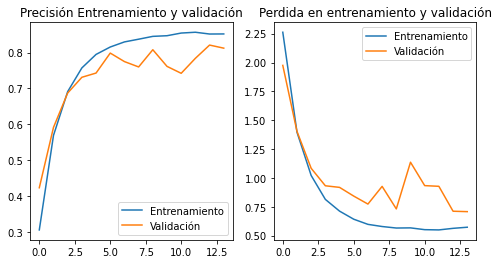

In [ ]:
plot_result(history, 'accuracy', 'loss' )

## Modelo 4

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 3]))
model4.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model4.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.1))
model4.add(tf.keras.layers.Dense(units=18, activation='softmax'))

model4.compile(loss="sparse_categorical_crossentropy", 
              optimizer='rmsprop', 
              metrics=["sparse_categorical_accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history4 = model4.fit(X_train,y_train,
                    batch_size=64,
                    epochs=20, 
                    callbacks=[callback],
                    validation_data=(X_valid, y_valid))
print(model4.summary())

Epoch 1/20
238/238 [==============================] - 10s 43ms/step - loss: 2.1080 - sparse_categorical_accuracy: 0.4094 - val_loss: 1.2583 - val_sparse_categorical_accuracy: 0.6417
Epoch 2/20
238/238 [==============================] - 10s 42ms/step - loss: 0.9015 - sparse_categorical_accuracy: 0.7351 - val_loss: 1.0991 - val_sparse_categorical_accuracy: 0.6928
Epoch 3/20
238/238 [==============================] - 10s 43ms/step - loss: 0.3952 - sparse_categorical_accuracy: 0.8811 - val_loss: 0.8422 - val_sparse_categorical_accuracy: 0.7968
Epoch 4/20
238/238 [==============================] - 10s 43ms/step - loss: 0.1587 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.8314 - val_sparse_categorical_accuracy: 0.8231
Epoch 5/20
238/238 [==============================] - 10s 43ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9779 - val_loss: 1.6937 - val_sparse_categorical_accuracy: 0.7557
Epoch 6/20
238/238 [==============================] - 10s 43ms/step - loss: 0.0546 - spars

Evaluate Score: 0.9134831460674158
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        48
           1       0.98      0.92      0.95        50
           2       0.90      0.92      0.91        50
           3       0.93      0.81      0.87        48
           4       0.96      0.96      0.96        50
           5       0.98      0.96      0.97        49
           6       0.86      0.88      0.87        50
           7       0.86      0.88      0.87        50
           8       1.00      0.92      0.96        50
           9       0.94      1.00      0.97        50
          10       0.88      0.84      0.86        50
          11       0.96      1.00      0.98        50
          12       1.00      0.96      0.98        49
          13       0.80      0.96      0.87        50
          14       0.91      0.80      0.85        49
          15       1.00      0.86      0.92        50
          16       0.74      0.98      0.84   

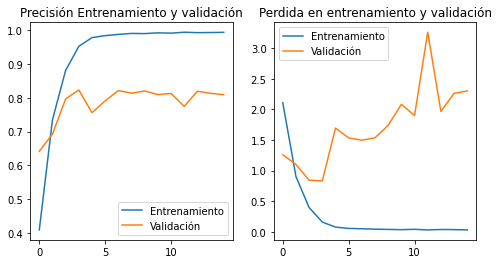

In [ ]:
predicciones = model4.predict(X_t)
y_pred = np.argmax(predicciones, axis=1)
score = accuracy_score(y_t, y_pred)
print(f"Evaluate Score: {score}")
print(classification_report(y_t, y_pred))
plot_result(history4)
print(model4.evaluate(X_t, y_t))

## Modelo 5 - Básico Fully Conected

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
model5 = tf.keras.models.Sequential()
model5.add(Flatten(input_shape=[64, 64, 3]))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(18, activation='softmax'))

model5.compile(loss='sparse_categorical_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy']
            )

model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6291968   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 18)                2322      
Total params: 6,458,514
Trainable params: 6,458,514
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history5 = model5.fit(X_train,y_train,
                    batch_size=64,
                    epochs=40,
                    validation_data=(X_valid, y_valid)
                    )

Epoch 1/40
238/238 [==============================] - 2s 8ms/step - loss: 3.4975 - accuracy: 0.1360 - val_loss: 2.5735 - val_accuracy: 0.1772
Epoch 2/40
238/238 [==============================] - 2s 7ms/step - loss: 2.3755 - accuracy: 0.2638 - val_loss: 2.1241 - val_accuracy: 0.3440
Epoch 3/40
238/238 [==============================] - 2s 7ms/step - loss: 2.1620 - accuracy: 0.3297 - val_loss: 2.0887 - val_accuracy: 0.3496
Epoch 4/40
238/238 [==============================] - 2s 7ms/step - loss: 2.0160 - accuracy: 0.3783 - val_loss: 2.1167 - val_accuracy: 0.3448
Epoch 5/40
238/238 [==============================] - 2s 7ms/step - loss: 1.9150 - accuracy: 0.4097 - val_loss: 1.9974 - val_accuracy: 0.3983
Epoch 6/40
238/238 [==============================] - 2s 7ms/step - loss: 1.8283 - accuracy: 0.4392 - val_loss: 1.8901 - val_accuracy: 0.4106
Epoch 7/40
238/238 [==============================] - 2s 7ms/step - loss: 1.7467 - accuracy: 0.4643 - val_loss: 1.9191 - val_accuracy: 0.4033
Epoch 

In [ ]:
test_loss, test_accuracy = model5.evaluate(X_t, y_t)

28/28 [==============================] - 0s 2ms/step - loss: 350.0553 - accuracy: 0.6135


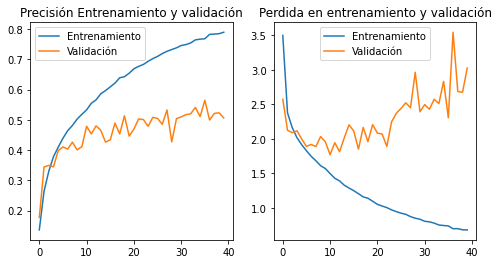

In [ ]:
plot_result(history5, 'accuracy')

## Referencias

https://enmilocalfunciona.io/tratamiento-de-imagenes-usando-imagedatagenerator-en-keras/<br>
https://medium.com/@olagokeibrahim165/split-train-data-into-training-and-validation-when-using-imagedatagenerator-in-keras-ffdc88bbf6f3<br>
https://keras.io/api/preprocessing/image/<br>
https://keras.io/guides/sequential_model/<br>

<hr>
<h4 align="center"> Fin de la Actividad - Actividad Grupal </h4>
<p align="center"> Actividad : Redes Neuronales Convolucionales <p>